In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
import tensorflow as tf
print(tf.__version__)

2024-05-28 11:32:02.061849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import numpy as np

# Database
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Veamos los datos


In [4]:
import pandas as pd

In [5]:
# Leer los datos 
# En local: tenemos que tener el fichero en la misma carpeta que el notebook (o cambiar la ruta)
# En Colab: abre la carpeta (usando el boton de la izquierda) y arrastralos dentro desde tu ordenador.
dataset = pd.read_csv("datos/googl.us.txt", delimiter=",")

In [6]:
# Tenemos 5 datos por dia
dataset

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0
...,...,...,...,...,...,...,...
3328,2017-11-06,1049.100,1052.59,1042.000,1042.680,913954,0
3329,2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832,0
3330,2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469,0
3331,2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994,0


In [7]:
# Estos son los datos de apertura
dataset['Open']

0         50.000
1         50.505
2         55.375
3         55.620
4         52.480
          ...   
3328    1049.100
3329    1049.650
3330    1050.050
3331    1048.000
3332    1043.870
Name: Open, Length: 3333, dtype: float64

In [8]:
# Nos guardamos la serie de apertura en la variable 'aa'
aa = dataset['Open']
aa.shape

(3333,)

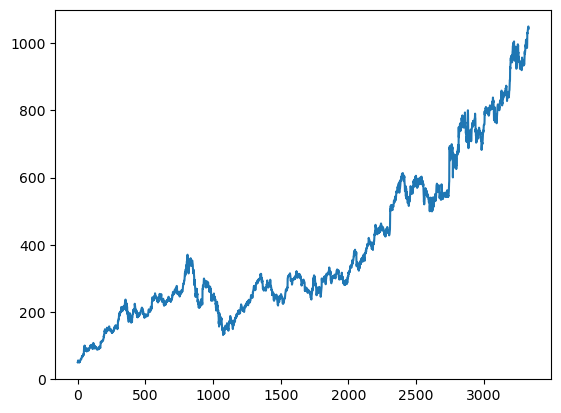

In [9]:
# Ploteamos los datos de apertura
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(aa)

<Axes: >

<Figure size 640x480 with 0 Axes>

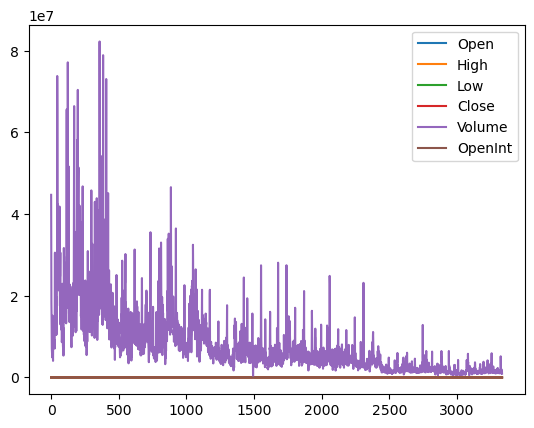

In [10]:
# Ploteamos todos los datos (solo se ven los de volumen porque los valores son muy grandes)
%matplotlib inline
plt.figure()
dataset.plot()

In [11]:
# Nos guardamos los datos de apertura y cierra
googl_op = dataset['Open']
googl_cl = dataset['Close']

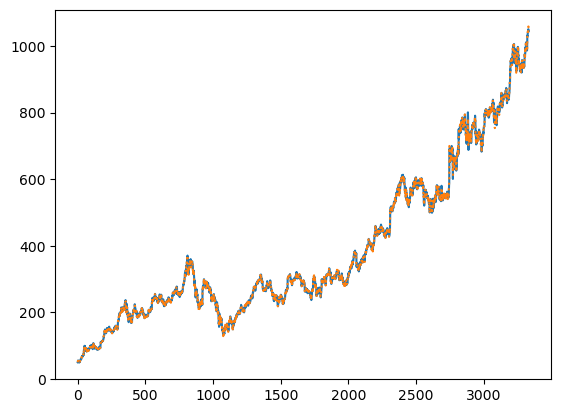

In [12]:
# Ploteamos los datos de apertura y cierra
%matplotlib inline
plt.figure()
plt.plot(googl_op)
plt.plot(googl_cl,':')

In [13]:
# Reordenamos los datos para usarlos después
# Generamos datos de entrada de 10 dias de apertura
# El dato de salida (a predecir) es el de cierre del úúltimo dia
# Partimos en entrenamiento y test
import numpy as np
xx = googl_op.values[np.arange(0,2000,1)]
yy = googl_cl.values[np.arange(0,2000,1)]
                     
X_train = np.reshape(xx,(200,10,1))
y_train = yy[np.arange(9,2000,10)]
                     
xx = googl_op.values[np.arange(2000,3000,1)]
yy = googl_cl.values[np.arange(2000,3000,1)]
X_test = np.reshape(xx,(100,10,1))
y_test = yy[np.arange(9,1000,10)]

In [14]:
# Dimensiones -> (Número de datos, Número de dimensiones, Número de canales)
X_train.shape

(200, 10, 1)

In [15]:
y_train.shape

(200,)

# MODELO

In [16]:
# Creamos un modelo sencillo de convolucióón 1D
model = Sequential()
capa_1 = Conv1D(10, kernel_size = (3,), input_shape=(10,1))
model.add(capa_1)
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')


2024-05-28 11:34:15.537137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 11:34:15.540023: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
# Vemos como es el modelo (capas, parámetros...)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 10)             40        
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Entrenamos el modelo
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
7/7 [==============================] - 1s 43ms/step - loss: 256.8886
Epoch 2/10
7/7 [==============================] - 0s 36ms/step - loss: 191.8206
Epoch 3/10
7/7 [==============================] - 0s 47ms/step - loss: 126.4477
Epoch 4/10
7/7 [==============================] - 0s 15ms/step - loss: 60.0070
Epoch 5/10
7/7 [==============================] - 0s 30ms/step - loss: 14.9446
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 26.2038
Epoch 7/10
7/7 [==============================] - 0s 27ms/step - loss: 9.8008
Epoch 8/10
7/7 [==============================] - 0s 23ms/step - loss: 11.7884
Epoch 9/10
7/7 [==============================] - 0s 39ms/step - loss: 8.3265
Epoch 10/10
7/7 [==============================] - 0s 35ms/step - loss: 7.1647


In [19]:
# Predecimos sobre los datos de test
y_hat = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


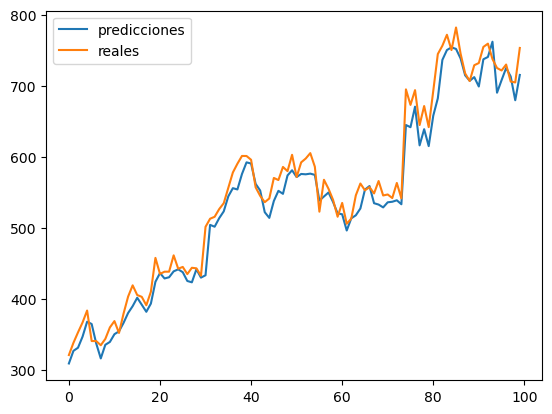

In [20]:
# Ploteamos las predicciones y los valores reales
# (En la vida real no tendriamos y_test para poder visualizarlos)
%matplotlib inline
plt.figure()
plt.plot(y_hat,label='predicciones')
plt.plot(y_test,label='reales')
plt.legend()

In [21]:
# Evaluamos sobre los datos de test
# (En la vida real no tendriamos y_test para poder evaluar)
score = model.evaluate(X_test, y_test, batch_size=128)

score

1/1 [==============================] - 0s 74ms/step - loss: 17.3592


17.35915184020996